In [292]:
%matplotlib notebook
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
import numpy as np

pics = []
for i in range(59):
    base_pic = './Set1/image'
    pics.append(base_pic + str(i + 1) + '.jpg')

<IPython.core.display.Javascript object>


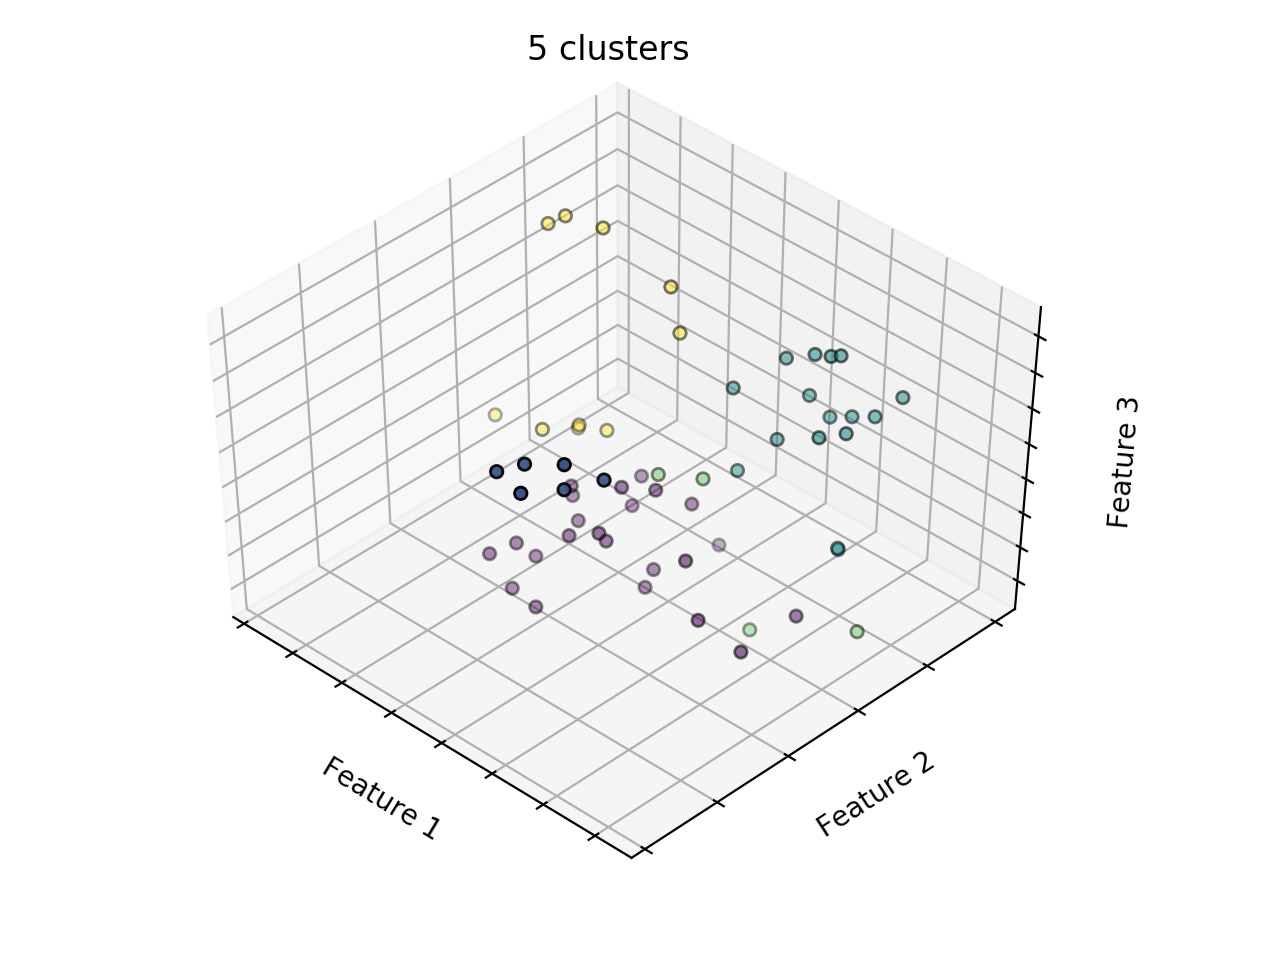

In [293]:
# Load the pretrained model
model = models.resnet18(pretrained=True)
# Use the model object to select the desired layer
layer = model._modules.get('avgpool')
model.eval()
scaler = transforms.Scale(224)
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()
def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data)
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding
picsfv = []
for pic in pics:
    picsfv.append(get_vector(pic))
regfv = []
for fv in picsfv:
#     print type(fv.numpy())
    regfv.append(fv.numpy())
regfv = np.array(regfv)

plt.cla()
pca = decomposition.PCA(n_components=4)
pca.fit(regfv)
regfv = pca.transform(regfv)

In [294]:
# regfv

In [295]:
from sklearn import cluster
from sklearn import decomposition
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

numClusters = 5
title = str(numClusters) + ' clusters'
name = 'k_means_iris_8'
est = cluster.KMeans(init='k-means++', n_clusters=numClusters, random_state=42)
fignum = 1
fig = plt.figure(fignum, figsize=(3, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
est.fit(regfv)
labels = est.labels_

In [296]:
# est.labels_
# for i in range(len(est.labels_)):
#     print "image" + str(i + 1) + " in cluster " + str(est.labels_[i]);
# len(regfv)

In [297]:
ax.scatter(regfv[:, 2], regfv[:, 0], regfv[:, 1],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title(title)
ax.dist = 12

In [298]:
# model = models.resnet18(pretrained=True)
# Use the model object to select the desired layer
# model._modules
# layer = model._modules.get('avgpool')

In [299]:
#Select medoid from each cluster
#labels, regfv
from scipy.spatial import distance
clustersWN = []
clusters = []
for i in range(numClusters):
    clusters.append([])
    clustersWN.append([])
for i in range(len(regfv)):
    clusterNum = labels[i]
    clusters[clusterNum].append(regfv[i])
    clustersWN[clusterNum].append((regfv[i], i+1))
for i in range(len(clusters)):
    clusters[i] = np.array(clusters[i])
# clusters = np.array(clusters)
clusters
# clusters[1]
imgDistClusters = []
for i in range(numClusters):
    distMatrix = distance.pdist(clusters[i], 'euclidean')
    distMatrix = distance.squareform(distMatrix)
    imgDistClusters.append(np.sum(distMatrix, axis=0))
picSumIndex = []
for i in range(numClusters):
    picSumIndex.append(imgDistClusters[i].argmin())
summary = []
for i in range(numClusters):
    summary.append(clustersWN[i][picSumIndex[i]][1])

In [300]:
# Save cluster results to computer
# est.labels_
import os
# Save clusters
for i in range(1, len(est.labels_) + 1):
    basePicName = 'image' + str(i) + '.jpg'
    oldimgpath = './Set1/' + basePicName
    img = Image.open(oldimgpath)
    newPath = './Cluster Results/Cluster Results ' + str(numClusters) + '/Cluster ' + str(est.labels_[i-1])
    filename = os.path.join(newPath, basePicName)
    if not os.path.exists(os.path.dirname(filename)):
        try:
            os.makedirs(os.path.dirname(filename))
        except OSError as exc:
            print 'oops'
    img.save(filename)
    
# Save automatic summary
for num in summary:
    basePicName = 'image' + str(num) + '.jpg'
    oldimgpath = './Set1/' + basePicName
    img = Image.open(oldimgpath)
    newPath = './Cluster Results/Cluster Results ' + str(numClusters) + '/Automatic Summary'
    filename = os.path.join(newPath, basePicName)
    if not os.path.exists(os.path.dirname(filename)):
        try:
            os.makedirs(os.path.dirname(filename))
        except OSError as exc:
            print 'oops'
    img.save(filename)

In [301]:
distMatrix = distance.pdist(clusters[3], 'euclidean')
distMatrix = distance.squareform(distMatrix)
distMatrix

array([[  0.        ,   9.8474236 ,   9.20794934,  10.64293716],
       [  9.8474236 ,   0.        ,  10.20507645,   8.39175833],
       [  9.20794934,  10.20507645,   0.        ,   3.28536648],
       [ 10.64293716,   8.39175833,   3.28536648,   0.        ]])